# Intro

The goal of this document is simply to explore the code within RITSAR and give step by step visualization to the ongoing processes. 

In [1]:
#Generic Import statements
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
#First, we need to find and bring our data files into memory
#The data file we will be using is in the data folder, specifically data/AFRL/pass1
#We have to start from the 'parent' directory which is '.'
directory='./data/AFRL/pass1'

#Our AFRL file reading code requires a starting azimuth and polarization
#I leave the details of file naming convention to the reader, let's cheat
subfile1='HH/data_3dsar_pass1_az001_HH.mat'
subfile2='HH/data_3dsar_pass1_az002_HH.mat'
subfile3='HH/data_3dsar_pass1_az003_HH.mat'
subfile4='HH/data_3dsar_pass1_az004_HH.mat'

#sorry for the additional import statements, but they are for this secion of the code
import pathlib
name=pathlib.Path(directory + '/' + subfile1)
print(name)

data/AFRL/pass1/HH/data_3dsar_pass1_az001_HH.mat


In [3]:
# read the .mat files (oddly complicated because they don't read as a dictionary even though they are built that way)

#https://stackoverflow.com/questions/7008608/scipy-io-loadmat-nested-structures-i-e-dictionaries
#User: mergen Date: 17 Jan 2012 Accessed: April 2019.
import scipy.io as sio # in import section already
def mergenloadmat(filename):
    '''
    this function should be called instead of direct spio.loadmat
    as it cures the problem of not properly recovering python dictionaries
    from mat files. It calls the function check keys to cure all entries
    which are still mat-objects
    '''
    data = sio.loadmat(filename, struct_as_record=False, squeeze_me=True)
    return _check_keys(data)

def _check_keys(dict):
    '''
    checks if entries in dictionary are mat-objects. If yes
    todict is called to change them to nested dictionaries
    '''
    for key in dict:
        if isinstance(dict[key], sio.matlab.mio5_params.mat_struct):
            dict[key] = _todict(dict[key])
    return dict        

def _todict(matobj):
    '''
    A recursive function which constructs from matobjects nested dictionaries
    '''
    dict = {}
    for strg in matobj._fieldnames:
        elem = matobj.__dict__[strg]
        if isinstance(elem, sio.matlab.mio5_params.mat_struct):
            dict[strg] = _todict(elem)
        else:
            dict[strg] = elem
    return dict

file1data=mergenloadmat(pathlib.Path(directory + '/' + subfile1))['data']
file2data=mergenloadmat(pathlib.Path(directory + '/' + subfile2))['data']
file3data=mergenloadmat(pathlib.Path(directory + '/' + subfile3))['data']
file4data=mergenloadmat(pathlib.Path(directory + '/' + subfile4))['data']

In [4]:
#Now let's explore what the data looks like
for key in file1data.keys():
    try:
        print(key, '  ', file1data[key].shape)
    except:
        print(key, '  ', 'No shape for this ')
        

fp    (424, 117)
freq    (424,)
x    (117,)
y    (117,)
z    (117,)
r0    (117,)
th    (117,)
phi    (117,)
af    No shape for this 


In [5]:
print(file1data['af'].keys())
#these aren't used in our code

dict_keys(['r_correct', 'ph_correct'])


<IPython.core.display.Javascript object>


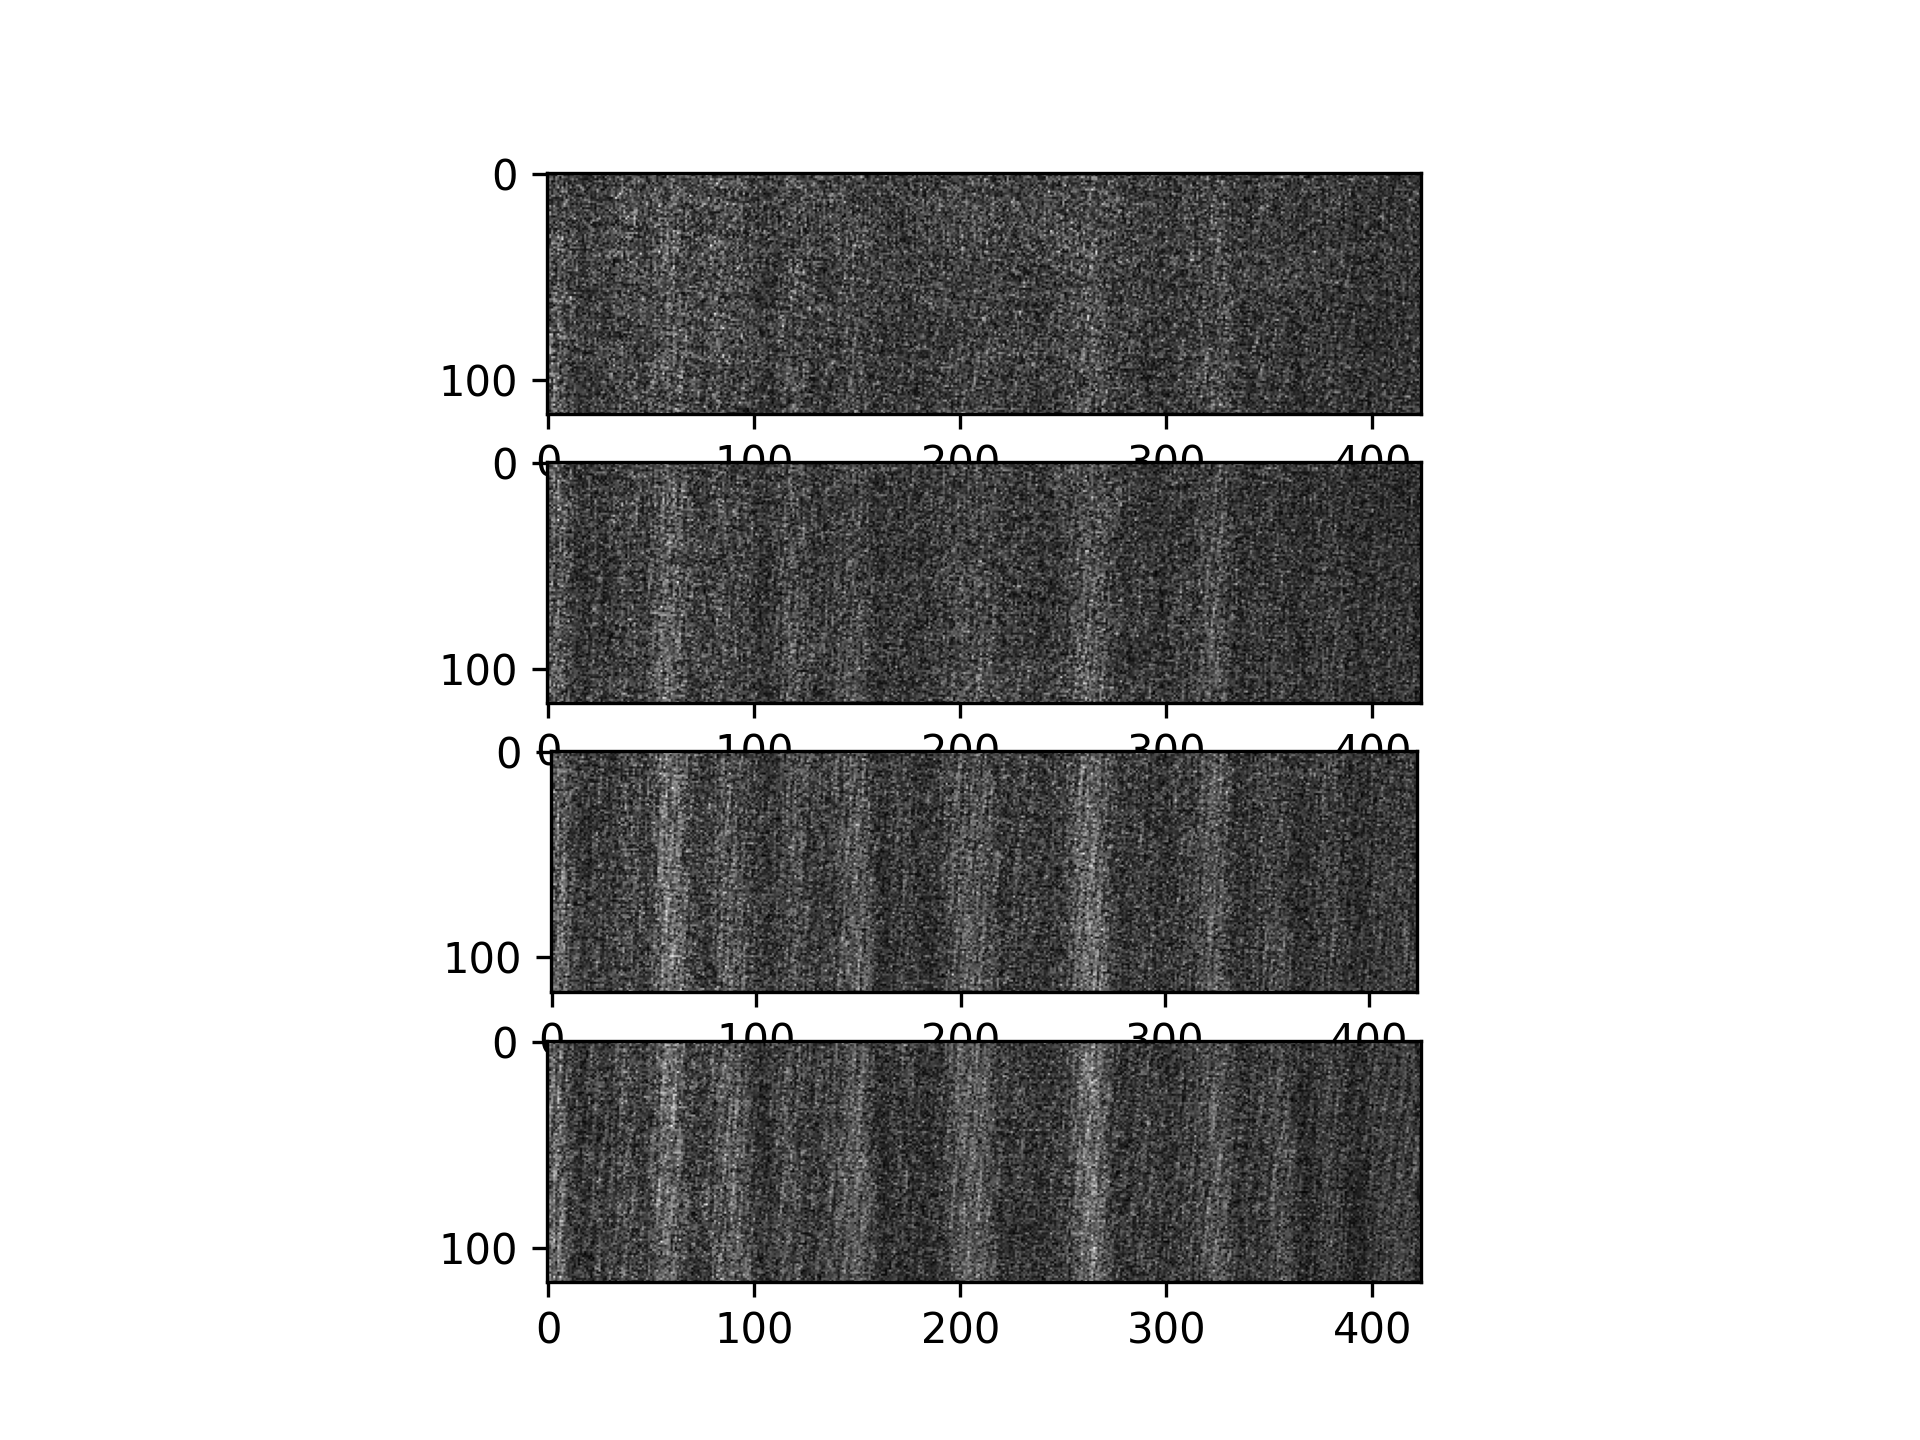

In [6]:
#now it's time to join this data into a phase history
#first, let's look at the sub components
keys=file1data.keys()
key='fp' if 'fp' in keys else 'fq' #Used for compatibility
phs_tmp1= file1data[key].T
phs_tmp2= file2data[key].T
phs_tmp3= file3data[key].T
phs_tmp4= file4data[key].T

fig,ax=plt.subplots(4,1)

ax[0].imshow(np.abs(phs_tmp1),cmap='gray')
ax[1].imshow(np.abs(phs_tmp2),cmap='gray')
ax[2].imshow(np.abs(phs_tmp3),cmap='gray')
ax[3].imshow(np.abs(phs_tmp4),cmap='gray')

<IPython.core.display.Javascript object>


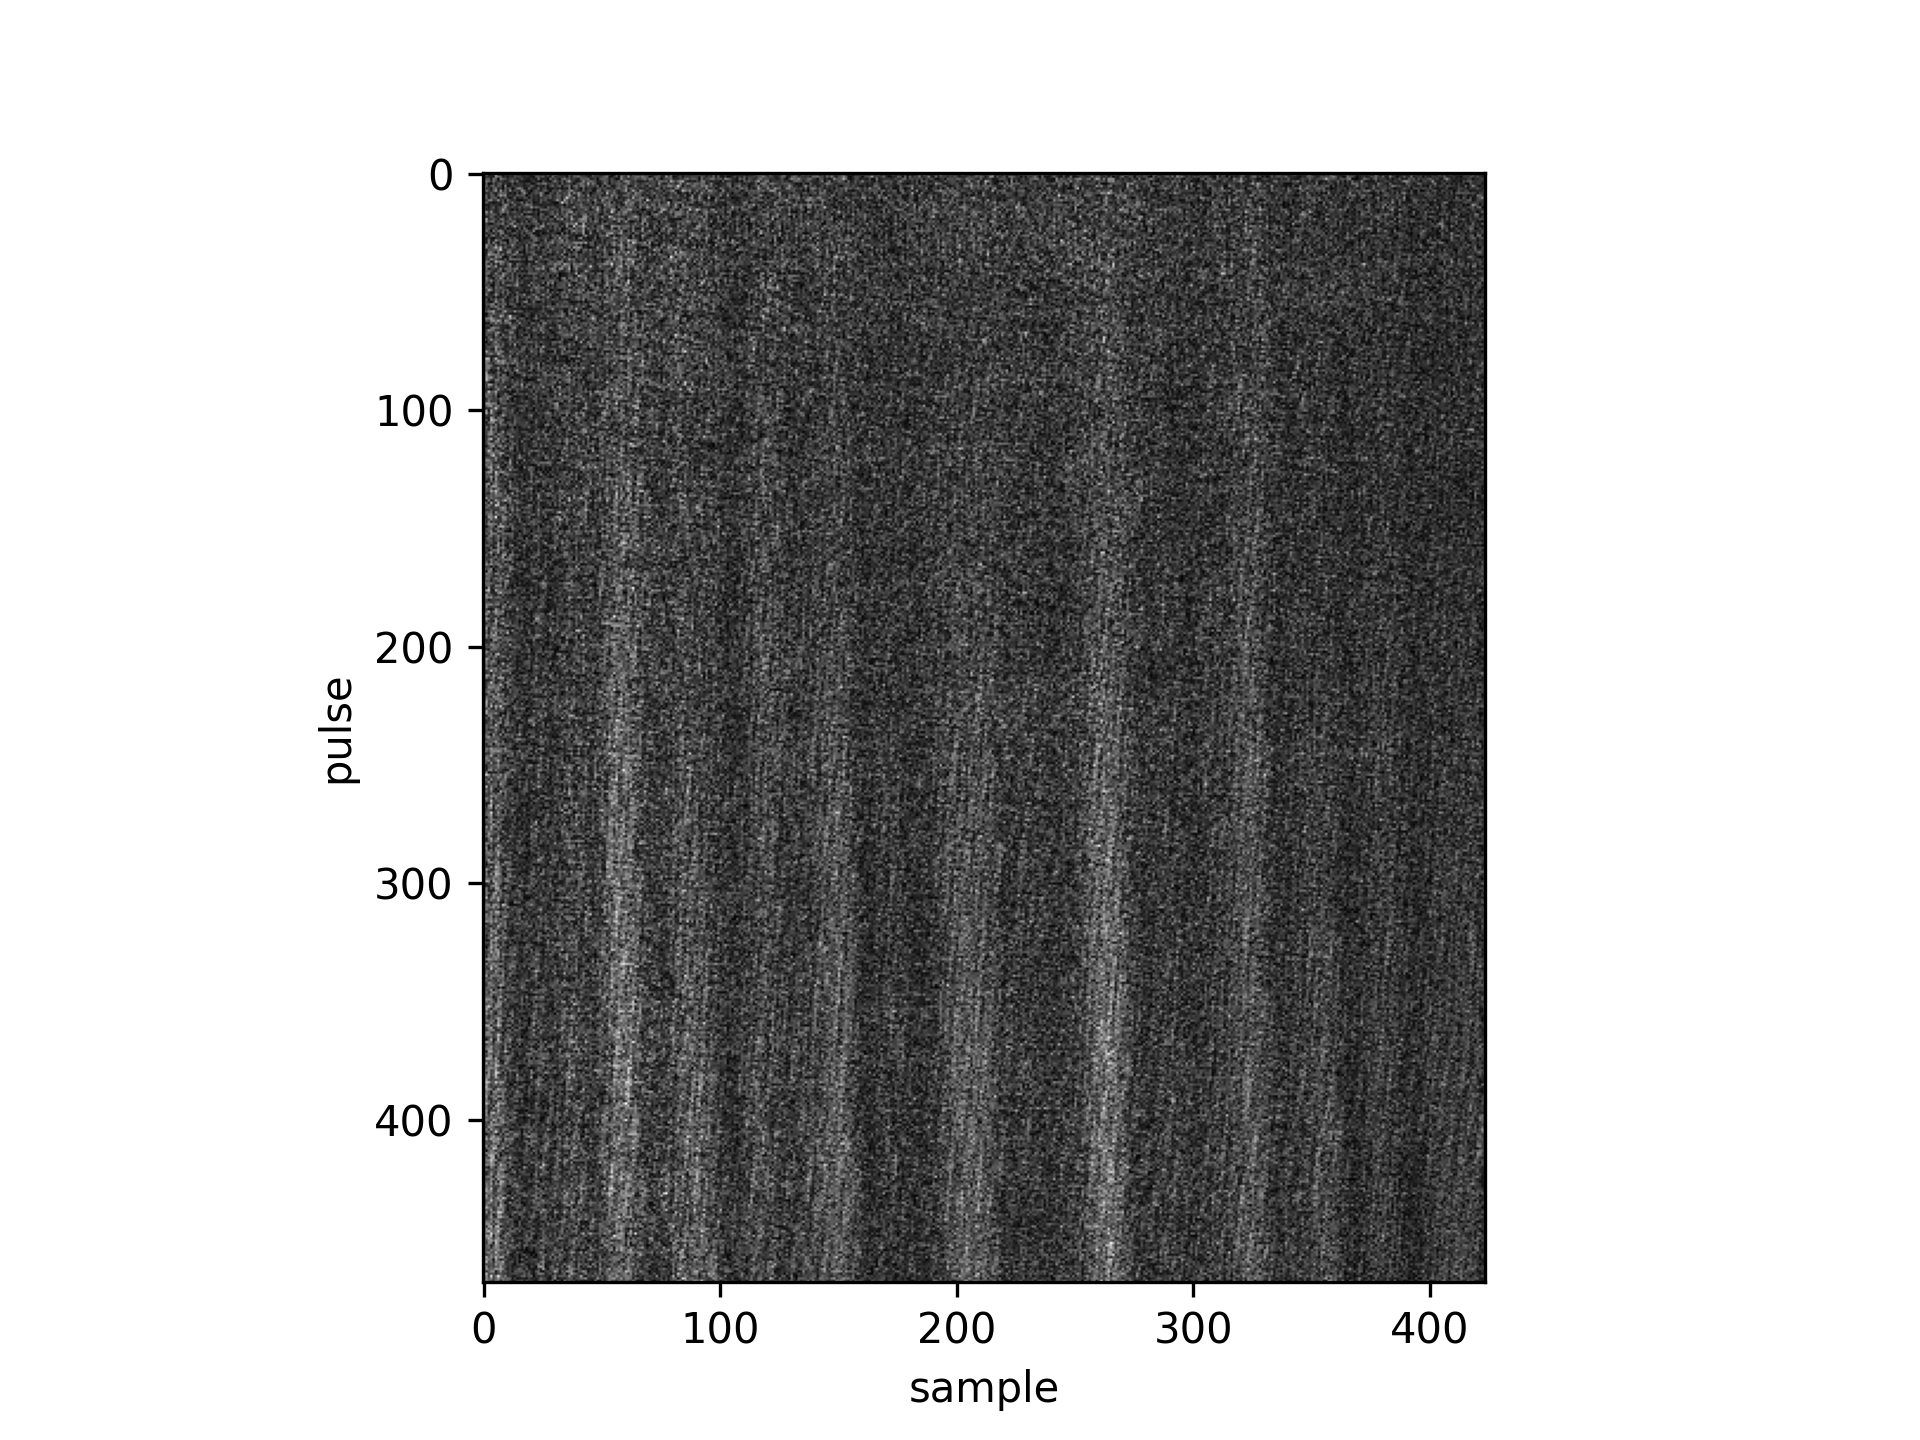

Text(0.5, 0, 'sample')

In [9]:
# join the phase histories ‐--------------, -------‐--------
phs=np.vstack([phs_tmp1,phs_tmp2,phs_tmp3,phs_tmp4])
plt.figure()               
plt.imshow(np.abs(phs),cmap='gray')
plt.ylabel('pulse')
plt.xlabel('sample')


<IPython.core.display.Javascript object>


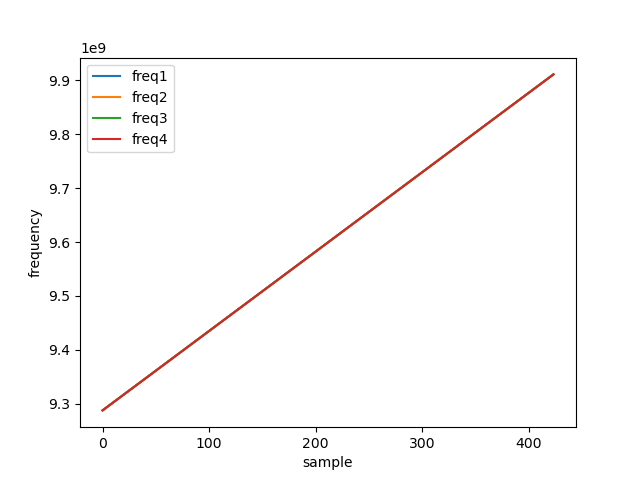

Text(0, 0.5, 'frequency')

In [29]:
#explore the other parameters-----------------------------
freq1= np.float64(file1data['freq'])
freq2= np.float64(file2data['freq'])
freq3= np.float64(file3data['freq'])
freq4= np.float64(file4data['freq'])

plt.figure()
plt.plot(freq1,label='freq1')
plt.plot(freq2,label='freq2')
plt.plot(freq3,label='freq3')
plt.plot(freq4,label='freq4')
plt.legend()
plt.xlabel('sample')
plt.ylabel('frequency')

<IPython.core.display.Javascript object>


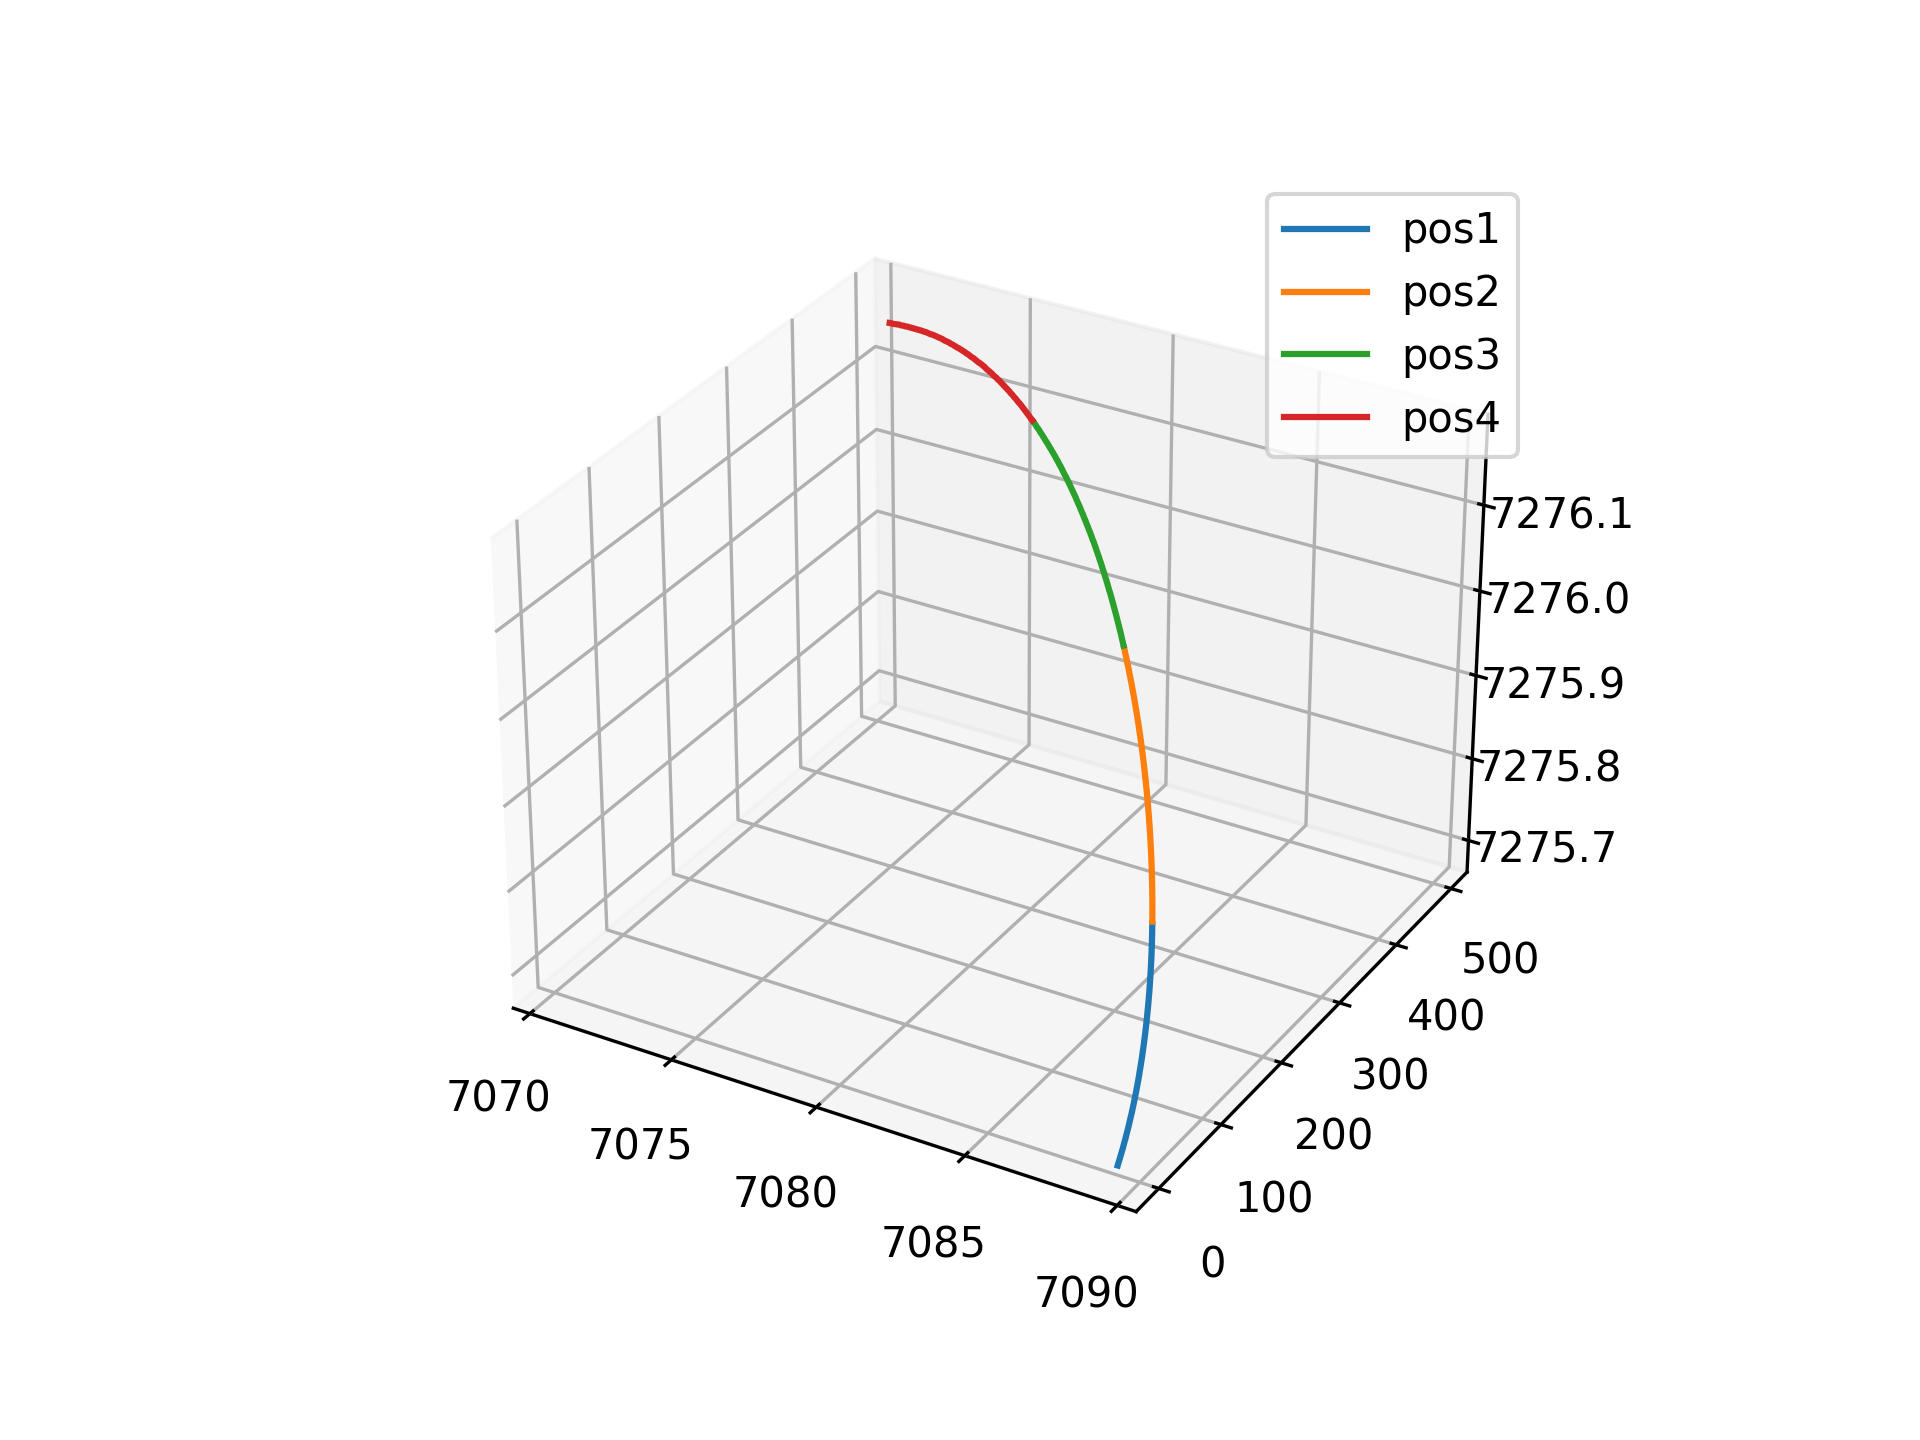

In [11]:
#now let's look at flight position---------------------------------------‐------------
pos1 = np.vstack((file1data['x'], file1data['y'], file1data['z'])).T
pos2 = np.vstack((file2data['x'], file2data['y'], file2data['z'])).T
pos3 = np.vstack((file3data['x'], file3data['y'], file3data['z'])).T
pos4 = np.vstack((file4data['x'], file4data['y'], file4data['z'])).T


plt.figure()
plt.axes(projection='3d')
plt.plot(pos1[:,0],pos1[:,1],pos1[:,2],label='pos1')
plt.plot(pos2[:,0],pos2[:,1],pos2[:,2],label='pos2')
plt.plot(pos3[:,0],pos3[:,1],pos3[:,2],label='pos3')
plt.plot(pos4[:,0],pos4[:,1],pos4[:,2],label='pos4')
#plt.gca().set_aspect('equal', adjustable='box')
plt.legend()


In [ ]:
#now let's look at r0, th, and phi
#I'm not seeing these getting used in image formation----------------
#I see the same variable names, but they don't come from platform

#r0
fig,ax=plt.subplots(3,1)
ax[0].plot(file1data['r0'], label="r0 - 1")
ax[0].plot(file2data['r0'], label="r0 - 2")
ax[0].plot(file3data['r0'], label="r0 - 3")
ax[0].plot(file4data['r0'], label="r0 - 4")
ax[0].legend()

#th
ax[1].plot(file1data['th'], label="th - 1")
ax[1].plot(file2data['th'], label="th - 2")
ax[1].plot(file3data['th'], label="th - 3")
ax[1].plot(file4data['th'], label="th - 4")
ax[1].legend()

#phi
ax[2].plot(file1data['phi'], label="phi - 1")
ax[2].plot(file2data['phi'], label="phi - 2")
ax[2].plot(file3data['phi'], label="phi - 3")
ax[2].plot(file4data['phi'], label="phi - 4")
ax[2].legend()




# Start the real business
Now that we know what the data looks like, let's start calculating the things we'll need to form an image